In [5]:
#!pip install textblob
from textblob import TextBlob
import selenium
import pandas as pd
from bs4 import BeautifulSoup
import time
import nltk
import re
from collections import defaultdict
from selenium import webdriver  
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
wn = nltk.WordNetLemmatizer()

In [6]:
review_dataframe=pd.read_excel('Final_Dataframe.xlsx')

In [7]:
review_dataframe

,Unnamed: 0,Title,Age Group,Game Description,Parental Guidance,Kids Thinking,Game Theme,Developer,Parents Reviews,Parents Rating,Kids Reviews,Kids Rating,Genre
0,0,Astro's Playroom,6+,"In ASTRO'S PLAYROOM, players guide Astro throu...",What parents need to know\n\n\nParents need to...,Families can talk about progress. How have som...,"Adventures, Robots",Sony Interactive Entertainment,NaN,NaN,NaN,NaN,Arcade
1,1,Yakuza: Like a Dragon,18+,YAKUZA: LIKE A DRAGON is both the latest seque...,What parents need to know\n\n\nParents need to...,Families can talk about the game's protagonist...,Adventures,Sega of America,NaN,NaN,NaN,NaN,Role-Playing
2,2,DIRT 5,10+,"While DIRT 5, like most racing games, doesn't ...",What parents need to know\n\n\nParents need to...,Families can talk about advertising. Like in r...,Cars and Trucks,Deep Silver,NaN,NaN,NaN,NaN,Racing
3,3,Bright Memory,15+,"In BRIGHT MEMORY, a soldier named Shielia infi...",What parents need to know\n\n\nParents need to...,Families can talk about violence in video game...,Adventures,Playism,NaN,NaN,NaN,NaN,First-Person Shooter
4,4,Assassin's Creed: Valhalla,16+,The next historic chapter in the epic Assassin...,What parents need to know\n\n\nParents need to...,Families can talk about historic representatio...,"Magic and Fantasy, Adventures, History, Misfit...",UbiSoft,\n\nThis review...\n\nHelped me decide\n\n \nH...,5.0,\nThis title contains: Violence & scarinessLan...,5.0,Action/Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,4924,Age of Empires II: Age of Kings,13+,AGE OF EMPIRES II: THE AGE OF KINGS is a histo...,What parents need to know\n\n\nParents need to...,Families can talk about how this type of game ...,NaN,Microsoft,"\nGreat soundtrack, and emphasizes on importan...",4.0,\nit is best game ever i play it game first in...,5.0,Real-Time Strategy (RTS)
4925,4925,The Sims Vacation Expansion Pack,13+,Hardworking Sims can now relax on Vacation Isl...,What parents need to know\n\n\nParents need to...,Families can talk about the value of vacation....,NaN,Electronic Arts,NaN,NaN,\nAwesome\nLove this expansion pack for Sims 1...,5.0,Simulation
4926,4926,Crazy Taxi,13+,"In CRAZY TAXI, players, in the role of cab dri...",What parents need to know\n\n\nParents need to...,Families can talk about safe driving. Have you...,NaN,Activision,NaN,NaN,\nRated PG (frequent comic mayhem and mischief...,4.0,Action/Adventure
4927,4927,Super Smash Bros. Melee,10+,SUPER SMASH BROS. MELEE accommodates from one ...,What parents need to know\n\n\nParents need to...,Families can talk about the characters feature...,NaN,Nintendo,\n\nThis review...\n\nHelped me decide (1)\n\n...,5.0,\ntips\nAlright here are some more tips. First...,4.0,Fighting


In [8]:
review_dataframe=review_dataframe[~review_dataframe['Kids Reviews'].isna()]

In [9]:
review_dataframe=review_dataframe[~review_dataframe['Parents Reviews'].isna()]

In [10]:
review_dataframe

,Unnamed: 0,Title,Age Group,Game Description,Parental Guidance,Kids Thinking,Game Theme,Developer,Parents Reviews,Parents Rating,Kids Reviews,Kids Rating,Genre
4,4,Assassin's Creed: Valhalla,16+,The next historic chapter in the epic Assassin...,What parents need to know\n\n\nParents need to...,Families can talk about historic representatio...,"Magic and Fantasy, Adventures, History, Misfit...",UbiSoft,\n\nThis review...\n\nHelped me decide\n\n \nH...,5.0,\nThis title contains: Violence & scarinessLan...,5.0,Action/Adventure
12,12,Watch Dogs: Legion,18+,WATCH DOGS LEGION is an open world action adve...,What parents need to know\n\n\nParents need to...,Families can talk about the impact of violence...,"Activism, Adventures, Misfits and Underdogs, R...",UbiSoft,\nShouldn’t be a 18. Watchdogs legion...,4.0,"\nGreat game, but not for children under 13\nT...",5.0,Action/Adventure
16,16,Ghostrunner,18+,GHOSTRUNNER is a futuristic action game that s...,What parents need to know\n\n\nParents need to...,Families can talk about violence in video game...,"Sports and Martial Arts, Adventures, Misfits a...",505 Games,\nHotline Miami meets Titanfall\nCombat is gor...,4.0,"\n14+\nthis is a speedrunning game, meaning ki...",5.0,First-Person Shooter
23,23,Amnesia: Rebirth,18+,AMNESIA: REBIRTH is the next fear-inducing cha...,What parents need to know\n\n\nParents need to...,Families can talk about facing fears. What are...,"Magic and Fantasy, Adventures, Misfits and Und...",Frictional Games,\nGood horror\nI think it’s a good horror game...,4.0,\n11+\nI've played this game and its very fun....,5.0,Survival Horror
33,33,FIFA 21,10+,FIFA 21 is the newest chapter in the soccer fr...,What parents need to know\n\n\nParents need to...,Families can talk about consumerism in FIFA 21...,Sports and Martial Arts,EA Sports,\nIt's realistic but not that realistic\n\nThi...,5.0,\nFun but design improvement for Nintendo Swit...,2.0,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,4921,Mario Party 4,8+,"The popular characters of Mario, Luigi, and Yo...",What parents need to know\n\n\nParents need to...,Families can talk about the playing games alon...,NaN,Nintendo,\nviolet very young kids nightmare 5 year\ntoo...,3.0,\nFun game for anybody who can hold a controll...,4.0,Action/Adventure
4922,4922,Star Wars: Knights of the Old Republic,13+,STAR WARS: KNIGHTS OF THE OLD REPUBLIC lets fa...,What parents need to know\n\n\nParents need to...,Families can talk about good and evil. Are dom...,NaN,LucasArts,"\n...Pardon?\nSo this is less of a review, and...",5.0,\nBest Star Wars Game Out There!\nIt is a good...,5.0,Action/Adventure
4923,4923,Star Wars: The Clone Wars,12+,STAR WARS: THE CLONE WARS allows players to ac...,What parents need to know\n\n\nParents need to...,Families can talk about sci-fi and fantasy. Is...,NaN,LucasArts,\nCan be dark\n---the good---\ngood messege ab...,4.0,\nOh. My. God. \nThis is extremly hard! In Jed...,3.0,Action/Adventure
4924,4924,Age of Empires II: Age of Kings,13+,AGE OF EMPIRES II: THE AGE OF KINGS is a histo...,What parents need to know\n\n\nParents need to...,Families can talk about how this type of game ...,NaN,Microsoft,"\nGreat soundtrack, and emphasizes on importan...",4.0,\nit is best game ever i play it game first in...,5.0,Real-Time Strategy (RTS)


In [11]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(["game","review","title", "kid","parent","play"])
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
#This function will remove unwanted special characters, repetative words and less important words
def clean_reviews(review):  
    clean_review=re.sub(r'[^\w\s].',' ',review).lower()
    text_to_clean = ['this review...','helped me decide','read my mind','report this review','show less', 'had useful details','\n','\xa0',"game","review","title", "kid","parent","play"]
    for text1 in text_to_clean:
        clean_review=clean_review.replace(text1,'')
    words=re.split(r'\W+', clean_review.strip())                   ### Split by remaining non-alphanumeric characters 
    
    ##!! Not removing stop words for "not"
    non_stop_words=[word for word in words if word not in stopword]        ### Remove stopwords
    lem_words= [wn.lemmatize(word) for word in non_stop_words]             ### Clean text ==
    clean_text= ' '.join(lem_words)
    return clean_text

In [13]:
review_dataframe['clean_kids_review']=review_dataframe['Kids Reviews'].apply(clean_reviews)

In [14]:
review_dataframe['clean_Parents_review']=review_dataframe['Parents Reviews'].apply(clean_reviews)

In [15]:
import spacy
from spacy import displacy

#https://spacy.io/api
    
nlp = spacy.load("en_core_web_sm")

In [16]:
def get_aspects(text):
    doc=nlp(text)
    noun_adj_pairs=[]
    #print([ (c, c.pos_) for c in doc])
    for i,token in enumerate(doc):

        
        ### Extract noun, adjective pairs where adjectives are
        ###  after the noun  (the food was (not) tasty)
        
        if token.pos_ in ('NOUN','PROPN'):
            if i <len(doc)-1 :
                adj=''
                
                for j in range(i+1,len(doc)):
                    
                    if doc[j].text in  ['no', 'not']:  
                        adj += 'not '
    
                    if doc[j].pos_   == 'ADJ':
                        adj += doc[j].text 
                        noun_adj_pairs.append((token.text,adj))
                        break
        
        ### Extract noun, adjective pairs where adjectives are
        ###  before the nouns: noun phrases (the tasty food)
        
        if token.pos_ in ('ADJ'):
            if i <len(doc) -1:
                if doc[i+1].pos_ in ('NOUN'):
                    noun_adj_pairs.append((doc[i+1].text, token.text))
                    break

    return noun_adj_pairs

In [1]:
#This function returns most occured topic from the reviews
def get_top_topic(topic_data_dict, limit):
    top_topic = []
    for key in topic_data_dict.keys():
        if len(topic_data_dict[key]) > limit:
            top_topic.append(key)
    return top_topic

In [2]:
#Calculate sentiment analysis
def get_sentiment(topic, topic_data_dict):
    sentiment_value=TextBlob(' '.join(topic_data_dict[topic])).sentiment
    return sentiment_value.polarity, sentiment_value.subjectivity

In [3]:
# Calculates the frequencies of topic 
def get_analyzed_data(topic_list, topic_data_dict):
    sentiment_dict={}
    for key in topic_list:
        polarity, subjectivity = get_sentiment(key, topic_data_dict)
        sentiment_dict[key] = [polarity,subjectivity,len(topic_data_dict[key])] 
    return sentiment_dict

In [4]:
#this function will generate overall analysis of a genre
def get_overall_sentiments(topic_data_dict):
    test_dict = {}
    counter = 0
    total_subjectivity = 0
    total_polarity = 0
    for key in topic_data_dict.keys():
        polarity, subjectivity = get_sentiment(key, topic_data_dict)
        total_polarity += polarity
        counter += 1
        total_subjectivity += subjectivity
    avg_polarity = total_polarity / counter
    avg_subjectivity = total_subjectivity/counter
    return avg_polarity, avg_subjectivity
        

In [5]:
# Create a dataframe including Polarity, Subjectivity and Appereances as per the topic
def generate_df(analyzed_dict):
    df = pd.DataFrame(analyzed_dict)
    df=df.T
    df=df.rename({0:'Polarity',1:'Subjectivity', 2:'Appereances'}, axis=1)
    df=df.sort_values(by=['Polarity'], ascending=False)
    return df
    
    

In [22]:
# Create a dictionary which represents topic and list of associated values
def generate_absa_game_topic_dict(reviews_df, reviewer):
    if reviewer == 'kids':
        user_aspect = 'kids_aspects'
    if reviewer == 'parents':
        user_aspect = 'parents_aspects'
    aspect_dict = defaultdict(list)
    for i, aspect_review in reviews_df[user_aspect].iteritems():
        for aspect in aspect_review:
            aspect_dict[aspect[0]].append(aspect[1])
    return aspect_dict


In [23]:
# Combine dfs for further processing
def generate_absa_polarity_df(absa_topic_dict, min_count):
    top_topics = get_top_topic(absa_topic_dict,min_count)
    analyzed_dict = get_analyzed_data(top_topics, absa_topic_dict)
    absa_df=generate_df(analyzed_dict)
    return absa_df
        
    

In [24]:
genre_list = review_dataframe.Genre.unique()
genre_list=genre_list.tolist()
genre_list = [x for x in genre_list if str(x) != 'nan']
genre_list

['Action/Adventure',
 'First-Person Shooter',
 'Survival Horror',
 'Sports',
 'Simulation',
 'Fighting',
 'Role-Playing',
 'Party',
 'Adventure',
 'Third-Person Shooter',
 'Puzzle',
 'Racing',
 'Strategy',
 'Music &amp; Dance',
 'Arcade',
 'Exergaming',
 'Educational',
 'Massively Multiplayer Online Game (MMOG)',
 'Mini-games',
 'Real-Time Strategy (RTS)',
 'Girl',
 'Preschool',
 'Edutainment',
 'Time Management',
 'Art']

In [25]:
def generate_overall_user_sentiments(review_df, genre_list, user):
    genre_sentiment = {}
    for genre in genre_list:
        gen_review_df=review_dataframe[review_df['Genre'] == genre]
        gen_topics=generate_absa_game_topic_dict(gen_review_df, user)
        gen_overall_polarity, gen_overall_sub=get_overall_sentiments(gen_topics)
        genre_sentiment[genre] = [gen_overall_polarity, gen_overall_sub]
    return genre_sentiment
        
        
        

In [26]:
review_dataframe['kids_aspects']=review_dataframe['clean_kids_review'].apply(get_aspects)

In [27]:
review_dataframe['parents_aspects']=review_dataframe['clean_Parents_review'].apply(get_aspects)

In [28]:
parents_overall_genre = generate_overall_user_sentiments(review_dataframe, genre_list, 'parents' )
parents_overall_genre

{'Action/Adventure': [0.16800133095373965, 0.510816968974298],
 'First-Person Shooter': [0.0721125504538285, 0.4750345883738376],
 'Survival Horror': [0.12435169362800938, 0.5165562897141844],
 'Sports': [0.11097730229697447, 0.4494192168891622],
 'Simulation': [0.12689455104680017, 0.41888908861227175],
 'Fighting': [0.13198409976520029, 0.5233319321118367],
 'Role-Playing': [0.1348659768007529, 0.5173716385772478],
 'Party': [0.1197805581951924, 0.48046017667968866],
 'Adventure': [0.21014601206873937, 0.541703502558048],
 'Third-Person Shooter': [0.054375638008279936, 0.5405638102799674],
 'Puzzle': [0.10528408248034421, 0.4226384544842492],
 'Racing': [0.17429812834224603, 0.3946428378513945],
 'Strategy': [0.08806448087060324, 0.5527175970288221],
 'Music &amp; Dance': [0.13576986799209037, 0.4832828950884514],
 'Arcade': [0.1790138432995576, 0.5442467396549028],
 'Exergaming': [0.28870056497175145, 0.4772598870056496],
 'Educational': [0.27554610959216214, 0.42306779021417174],
 

In [29]:
parents_df = pd.DataFrame.from_dict(parents_overall_genre, orient ='index')
parents_df = parents_df.rename(columns={0: 'Polarity', 1:'Subjectivity'})  #sort_values(by='Appereances', ascending= False)
parents_df.sort_values(by='Polarity', ascending= False)

,Polarity,Subjectivity
Edutainment,0.340944,0.571018
Exergaming,0.288701,0.477260
Educational,0.275546,0.423068
Massively Multiplayer Online Game (MMOG),0.253975,0.526433
Mini-games,0.235492,0.414676
Adventure,0.210146,0.541704
Girl,0.207704,0.401679
Arcade,0.179014,0.544247
Racing,0.174298,0.394643
Preschool,0.173285,0.449064


In [30]:
kids_overall_genre = generate_overall_user_sentiments(review_dataframe, genre_list, 'kids' )
kids_overall_genre

{'Action/Adventure': [0.19831317245840652, 0.5239670621937922],
 'First-Person Shooter': [0.11728397642116728, 0.4684351442970939],
 'Survival Horror': [-0.0239053792232671, 0.5888865486764193],
 'Sports': [0.22256905056927911, 0.5346636822773185],
 'Simulation': [0.20179264427147978, 0.46466439227890843],
 'Fighting': [0.025080865031845378, 0.4733444148444149],
 'Role-Playing': [0.24071251632823973, 0.5108082792328525],
 'Party': [0.2623726713265718, 0.48941568675611224],
 'Adventure': [0.13552930759880968, 0.4970259613024143],
 'Third-Person Shooter': [0.2518833717610892, 0.47956320450885614],
 'Puzzle': [0.3028636872386871, 0.4963737651237654],
 'Racing': [0.16038047746908501, 0.4171309691246397],
 'Strategy': [0.27984495016715505, 0.47403594507631763],
 'Music &amp; Dance': [0.3001656221059207, 0.45172099459412896],
 'Arcade': [0.23447696208112853, 0.4896880511463844],
 'Exergaming': [0.23792966983265493, 0.4677040931705111],
 'Educational': [0.1832240986625315, 0.4530214188796281]

In [31]:
kids_df = pd.DataFrame.from_dict(kids_overall_genre, orient ='index')
kids_df = kids_df.rename(columns={0: 'Polarity', 1:'Subjectivity'})  #sort_values(by='Appereances', ascending= False)
kids_df.sort_values(by='Polarity', ascending= False)

,Polarity,Subjectivity
Art,0.812500,0.812500
Puzzle,0.302864,0.496374
Music &amp; Dance,0.300166,0.451721
Mini-games,0.294116,0.471735
Strategy,0.279845,0.474036
Party,0.262373,0.489416
Third-Person Shooter,0.251883,0.479563
Preschool,0.247751,0.378256
Massively Multiplayer Online Game (MMOG),0.245202,0.535180
Role-Playing,0.240713,0.510808


In [32]:
pip install  wordcloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_WordCloud(data):
    counts = data['Appereances']
    wordcloud = WordCloud().generate_from_frequencies(counts)
    #plt.figure()
    plt.figure(figsize=(20,10)) 
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

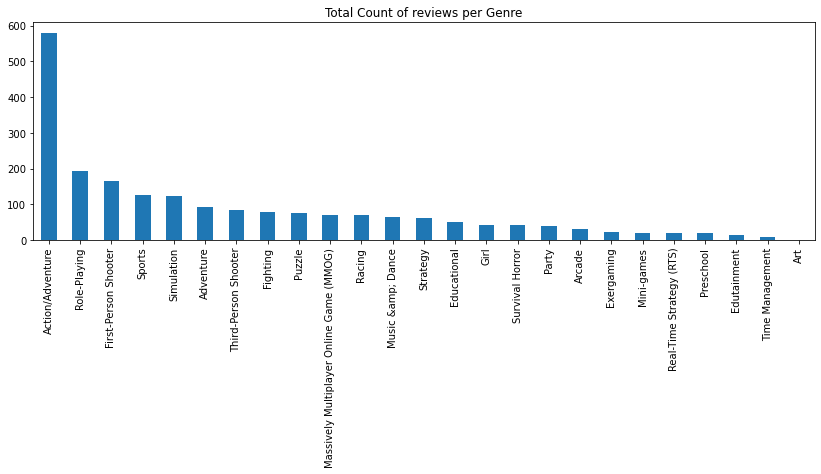

In [34]:
fig, axes = plt.subplots(figsize=(14, 4))
review_dataframe.Genre.value_counts().plot.bar(title='Total Count of reviews per Genre')

# Action/Adventure Genre

In [35]:
# Kid's sentiment analysis

In [37]:
action_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Action/Adventure']
len(action_review_dataframe)

580

In [38]:
action_kids_topics=generate_absa_game_topic_dict(action_review_dataframe,'kids')

In [40]:
action_kids_df=generate_absa_polarity_df(action_kids_topics,0)
top_10 = action_kids_df.sort_values(by='Appereances', ascending = False)

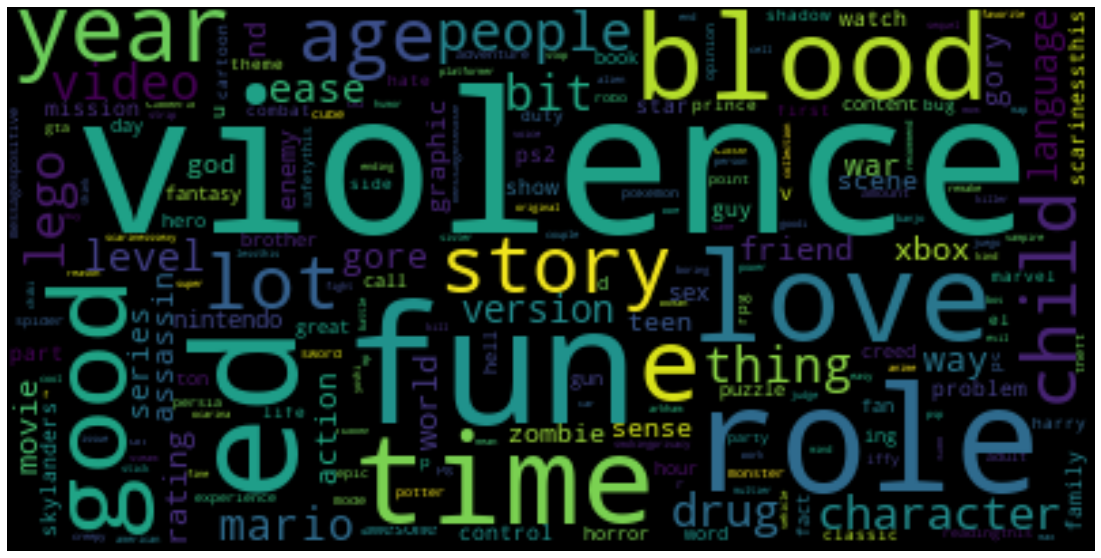

In [41]:
plot_WordCloud(action_kids_df)

In [42]:
top_10 = top_10.iloc[:10]

In [43]:
top_10

,Polarity,Subjectivity,Appereances
violence,0.049874,0.611755,87.0
fun,0.179228,0.650835,55.0
role,0.359091,0.616818,44.0
ed,0.167898,0.583853,42.0
time,0.213549,0.596300,31.0
blood,-0.007955,0.580195,31.0
love,0.390326,0.641142,31.0
good,0.301831,0.674811,27.0
e,0.084151,0.723485,26.0
year,0.192906,0.415197,25.0


In [44]:
# Parents sentiment analysis

In [45]:
action_parents_topics=generate_absa_game_topic_dict(action_review_dataframe,'parents')

In [46]:
action_parents_df=generate_absa_polarity_df(action_parents_topics,0)

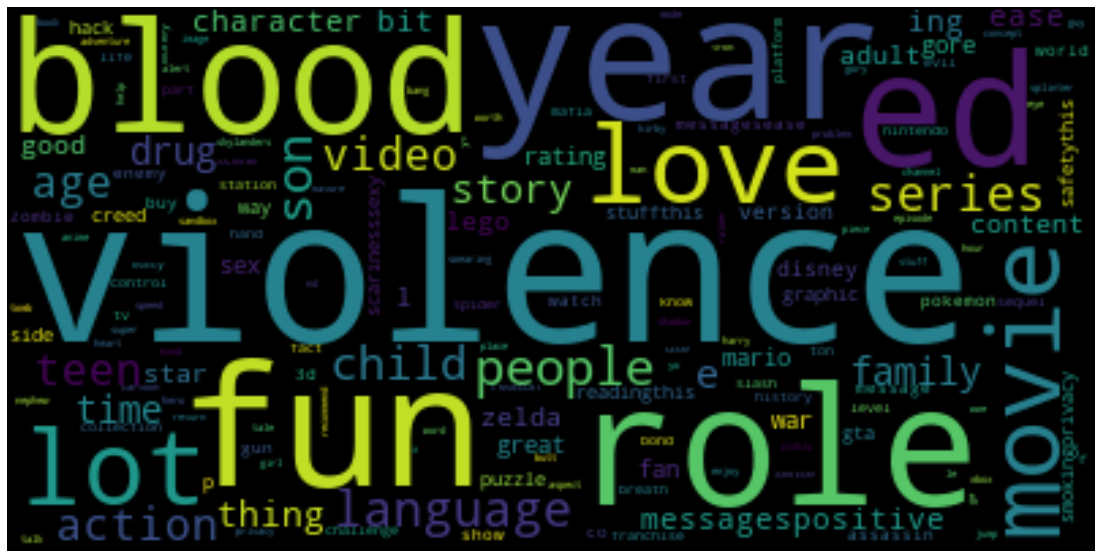

In [47]:
plot_WordCloud(action_parents_df)

In [48]:
top_10 = action_parents_df.sort_values(by='Appereances', ascending=False)

In [49]:
top_10.iloc[:10]

,Polarity,Subjectivity,Appereances
violence,0.163659,0.660536,55.0
year,0.141073,0.270393,38.0
fun,0.158272,0.532342,37.0
role,0.270248,0.550413,36.0
ed,0.036323,0.611835,32.0
blood,0.120071,0.553143,32.0
love,0.268782,0.591504,28.0
lot,0.100929,0.622494,25.0
movie,0.161037,0.589394,24.0
language,0.036458,0.723958,22.0


# Genre: Role Playing

In [484]:
rp_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Role-Playing']
len(rp_review_dataframe)

192

In [485]:
# RP kids analysis

In [486]:
rp_kids_topics=generate_absa_game_topic_dict(rp_review_dataframe,'kids')

In [487]:
rp_kids_df=generate_absa_polarity_df(rp_kids_topics,0)

In [489]:
top_10 = rp_kids_df.sort_values(by='Appereances', ascending= False)

In [490]:
top_10.iloc[:10]

,Polarity,Subjectivity,Appereances
violence,0.344805,0.610390,19.0
game,0.469048,0.573214,16.0
kid,0.052636,0.543878,15.0
fun,0.212397,0.350413,14.0
rpg,0.355944,0.549650,14.0
lot,0.172222,0.850694,13.0
e,0.104959,0.763567,11.0
role,-0.040057,0.698864,11.0
blood,0.184375,0.643750,10.0
love,0.161224,0.518707,10.0


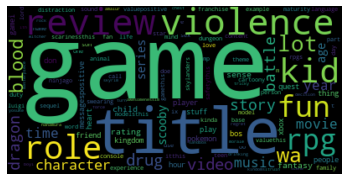

In [146]:
plot_WordCloud(rp_kids_df)

In [122]:
rp_kids_df

,Polarity,Subjectivity,Appereances
kindoms,1.0,1.0,1.0
turn,1.0,1.0,1.0
sandbox,1.0,1.0,1.0
witcher,1.0,0.3,1.0
chest,1.0,1.0,1.0
...,...,...,...
combat,-1.0,1.0,1.0
kay,-1.0,1.0,1.0
one,-1.0,1.0,2.0
instalment,-1.0,1.0,1.0


In [123]:
# RP Parents analysis

In [147]:
rp_parents_topics=generate_absa_game_topic_dict(rp_review_dataframe,'parents')

In [148]:
rp_parents_df=generate_absa_polarity_df(rp_parents_topics,5)

In [157]:
top_10 = rp_parents_df.sort_values(by='Appereances', ascending= False)

In [158]:
top_10.iloc[:10]

,Polarity,Subjectivity,Appereances
game,0.335167,0.591777,126.0
review,0.311191,0.573829,27.0
title,0.172500,0.505000,23.0
violence,0.114078,0.585732,16.0
kid,0.074756,0.514773,14.0
role,0.023636,0.551515,12.0
character,0.133333,0.488889,11.0
child,0.097917,0.458333,10.0
video,0.300000,0.350000,8.0
story,0.250000,0.492857,8.0


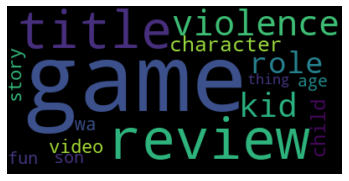

In [151]:
plot_WordCloud(rp_parents_df)

In [172]:
rp_parents_df

,Polarity,Subjectivity,Appereances
game,0.335167,0.591777,126.0
wa,0.315714,0.620000,7.0
review,0.311191,0.573829,27.0
fun,0.310909,0.508182,6.0
video,0.300000,0.350000,8.0
son,0.270000,0.220000,6.0
story,0.250000,0.492857,8.0
title,0.172500,0.505000,23.0
character,0.133333,0.488889,11.0
violence,0.114078,0.585732,16.0


# Genre : Educational

In [152]:
edu_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Educational']


In [153]:
# KIDS SENTIMENTS ANALYSIS

In [154]:
edu_kids_topics=generate_absa_game_topic_dict(edu_review_dataframe,'kids')

In [163]:
edu_kids_df=generate_absa_polarity_df(edu_kids_topics,0)

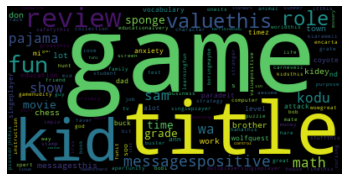

In [164]:
plot_WordCloud(edu_kids_df)

In [165]:
top_10 = edu_kids_df.sort_values(by='Appereances', ascending= False)

top_10.iloc[:10]

,Polarity,Subjectivity,Appereances
game,0.247661,0.556489,30.0
title,0.295758,0.448485,17.0
kid,0.103333,0.428333,10.0
review,0.172222,0.588889,7.0
fun,0.304167,0.529167,5.0
messagespositive,0.000000,0.000000,4.0
role,0.700000,0.600000,4.0
valuethis,0.250000,0.250000,4.0
kodu,-0.250000,1.000000,3.0
pajama,-0.121212,0.484848,3.0


In [178]:
# PARENTS SENTIMENTS ANALYSIS

In [179]:
edu_parents_topics=generate_absa_game_topic_dict(edu_review_dataframe,'parents')

In [180]:
edu_parents_df=generate_absa_polarity_df(edu_parents_topics,3)

In [181]:
edu_parents_df

,Polarity,Subjectivity,Appereances
violence,0.900000,0.875000,5.0
review,0.700000,0.650000,12.0
game,0.427614,0.542273,22.0
leapster,0.409091,0.515152,4.0
title,0.378512,0.592975,17.0
son,0.250000,0.645000,5.0
role,0.227273,0.545455,5.0


# Genre: Racing

In [182]:
racing_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Racing']


In [183]:
# Kids sentimental analysis

In [184]:
racing_kids_topics=generate_absa_game_topic_dict(racing_review_dataframe,'kids')

In [185]:
racing_kids_df=generate_absa_polarity_df(racing_kids_topics,5)

In [186]:
racing_kids_df

,Polarity,Subjectivity,Appereances
racing,0.462500,0.527083,9.0
game,0.321065,0.492978,42.0
review,0.200000,0.396667,6.0
title,0.134470,0.376894,6.0
forza,0.083333,0.606944,7.0


In [187]:
#Parents sentimental analysis

In [188]:
racing_parents_topics=generate_absa_game_topic_dict(racing_review_dataframe,'parents')

In [189]:
racing_parents_df=generate_absa_polarity_df(racing_parents_topics,5)
racing_parents_df

,Polarity,Subjectivity,Appereances
title,0.461688,0.383766,7.0
review,0.433333,0.500000,7.0
racing,0.410000,0.620000,6.0
son,0.400000,0.500000,6.0
game,0.235988,0.602125,40.0
kid,-0.063510,0.607576,6.0


# Genre: First Person Shooter

In [190]:
fps_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'First-Person Shooter']

In [191]:
#Kids Analysis

In [192]:
fps_kids_topics=generate_absa_game_topic_dict(fps_review_dataframe,'kids')

In [193]:
fps_kids_df=generate_absa_polarity_df(fps_kids_topics,5)
fps_kids_df

,Polarity,Subjectivity,Appereances
role,0.700000,0.600000,8.0
shooter,0.265741,0.550926,11.0
title,0.217140,0.695928,18.0
kid,0.213258,0.439394,14.0
thing,0.208929,0.632143,7.0
game,0.198867,0.650364,112.0
language,0.175000,0.666667,6.0
year,0.085000,0.261667,6.0
fun,0.071667,0.688333,7.0
review,0.021875,0.628646,18.0


In [194]:
#Parents Analysis

In [195]:
fps_parents_topics=generate_absa_game_topic_dict(fps_review_dataframe,'parents')
fps_parents_df=generate_absa_polarity_df(fps_parents_topics,5)
fps_parents_df

,Polarity,Subjectivity,Appereances
halo,0.616667,0.450000,6.0
полоскитри,0.500000,0.500000,16.0
трипа,0.500000,0.500000,8.0
полоски,0.500000,0.500000,6.0
три,0.500000,0.500000,25.0
child,0.236364,0.570130,9.0
role,0.227273,0.545455,8.0
age,0.212727,0.660000,6.0
parent,0.211111,0.462963,11.0
review,0.194129,0.686588,19.0


# Genre: Adventure

In [196]:
adv_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Adventure']

In [197]:
#Kids Analysis

In [198]:
adv_kids_topics=generate_absa_game_topic_dict(adv_review_dataframe,'kids')
adv_kids_df=generate_absa_polarity_df(adv_kids_topics,5)
adv_kids_df

,Polarity,Subjectivity,Appereances
story,0.456250,0.621875,10.0
game,0.336310,0.529806,61.0
title,0.324188,0.563528,17.0
review,0.212500,0.560000,15.0
kid,-0.033333,0.594444,8.0


In [199]:
#Parents Analysis

In [200]:
adv_parents_topics=generate_absa_game_topic_dict(adv_review_dataframe,'parents')
adv_parents_df=generate_absa_polarity_df(adv_parents_topics,5)
adv_parents_df

,Polarity,Subjectivity,Appereances
title,0.270856,0.487701,17.0
review,0.177273,0.544529,15.0
game,0.152038,0.575024,42.0
kid,0.066477,0.626768,9.0
role,-0.216667,0.216667,11.0
child,-0.346212,0.650758,6.0


# Genre: Arcade

In [201]:
arcade_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Arcade']

In [202]:
#Kids Analysis

In [203]:
arcade_kids_topics=generate_absa_game_topic_dict(arcade_review_dataframe,'kids')
arcade_kids_df=generate_absa_polarity_df(arcade_kids_topics,5)
arcade_kids_df

,Polarity,Subjectivity,Appereances
game,0.469215,0.454959,23.0


In [204]:
#Parents Analysis

In [205]:
arcade_parents_topics=generate_absa_game_topic_dict(arcade_review_dataframe,'parents')
arcade_parents_df=generate_absa_polarity_df(arcade_parents_topics,5)
arcade_parents_df

,Polarity,Subjectivity,Appereances
game,0.467029,0.558696,23.0


# Genre: Art

In [206]:
art_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Art']

In [207]:
#Kids Analysis

In [208]:
art_kids_topics=generate_absa_game_topic_dict(art_review_dataframe,'kids')
art_kids_df=generate_absa_polarity_df(art_kids_topics,0) #Because only 1 complete review avaialble
art_kids_df

,Polarity,Subjectivity,Appereances
art,0.70,0.60,1.0
academy,0.70,0.60,1.0
reviewvery,0.70,0.60,1.0
valuesthis,0.25,0.25,1.0
title,0.25,0.25,1.0
messagespositive,0.00,0.00,1.0


In [209]:
#Parents Analysis

In [210]:
art_parents_topics=generate_absa_game_topic_dict(art_review_dataframe,'parents')
art_parents_df=generate_absa_polarity_df(art_parents_topics,0)
art_parents_df

,Polarity,Subjectivity,Appereances
die,0.025,0.4,1.0
ard,0.025,0.4,1.0
gamer,0.025,0.4,1.0
game,-0.050,0.4,1.0
car,-0.050,0.4,1.0


# Genre: Edutainment

In [211]:
edutain_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Edutainment']

In [212]:
#Kids Analysis
edutain_kids_topics=generate_absa_game_topic_dict(edutain_review_dataframe,'kids')
edutain_kids_df=generate_absa_polarity_df(edutain_kids_topics,2)
edutain_kids_df


,Polarity,Subjectivity,Appereances
game,0.429167,0.533333,6.0
title,0.242424,0.348485,4.0


In [213]:
#Parents Analysis
edutain_parents_topics=generate_absa_game_topic_dict(edutain_review_dataframe,'parents')
edutain_parents_df=generate_absa_polarity_df(edutain_parents_topics,2)
edutain_parents_df

,Polarity,Subjectivity,Appereances
review,0.700000,0.600000,5.0
title,0.359091,0.531818,6.0
child,0.333333,0.333333,3.0
game,0.250000,0.312500,9.0


# Genre: Exergaming

In [214]:
exer_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Exergaming']

In [215]:
#Kids Analysis
exer_kids_topics=generate_absa_game_topic_dict(exer_review_dataframe,'kids')
exer_kids_df=generate_absa_polarity_df(exer_kids_topics,2)
exer_kids_df

,Polarity,Subjectivity,Appereances
fun,0.556818,0.611364,4.0
game,0.443750,0.539583,8.0
title,0.227273,0.545455,3.0
song,0.187500,0.450000,3.0
time,-0.058333,0.300000,3.0


In [216]:
#Parents Analysis
exer_parents_topics=generate_absa_game_topic_dict(exer_review_dataframe,'parents')
exer_parents_df=generate_absa_polarity_df(exer_parents_topics,2)
exer_parents_df

,Polarity,Subjectivity,Appereances
game,0.474074,0.681481,9.0
title,0.234848,0.446970,4.0


# Genre: Fighting

In [217]:
fight_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Fighting']

In [218]:
#Kids Analysis
fight_kids_topics=generate_absa_game_topic_dict(fight_review_dataframe,'kids')
fight_kids_df=generate_absa_polarity_df(fight_kids_topics,5)
fight_kids_df

,Polarity,Subjectivity,Appereances
game,0.396127,0.528137,35.0
role,0.384848,0.563636,6.0
title,0.295960,0.530303,9.0
kid,0.244372,0.422244,9.0
blood,-0.166667,0.446154,6.0


In [219]:
#Parents Analysis
fight_parents_topics=generate_absa_game_topic_dict(fight_review_dataframe,'parents')
fight_parents_df=generate_absa_polarity_df(fight_parents_topics,5)
fight_parents_df

,Polarity,Subjectivity,Appereances
fighting,0.425000,0.737500,6.0
title,0.185606,0.548232,20.0
role,0.156818,0.511364,7.0
violence,0.117845,0.438384,12.0
year,0.100000,0.200000,6.0
review,0.090909,0.574242,15.0
t,0.077778,0.300000,6.0
game,0.063187,0.561416,56.0
scarinessthis,-0.054545,0.609091,6.0


# Genre: Girl

In [220]:
girl_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Girl']

In [221]:
#Kids Analysis
girl_kids_topics=generate_absa_game_topic_dict(girl_review_dataframe,'kids')
girl_kids_df=generate_absa_polarity_df(girl_kids_topics,5)
girl_kids_df

,Polarity,Subjectivity,Appereances
review,0.483333,0.619048,16.0
game,0.317528,0.601687,24.0
title,0.291515,0.456970,17.0


In [222]:
#Parents Analysis
girl_parents_topics=generate_absa_game_topic_dict(girl_review_dataframe,'parents')
girl_parents_df=generate_absa_polarity_df(girl_parents_topics,5)
girl_parents_df

,Polarity,Subjectivity,Appereances
review,0.558333,0.633333,10.0
game,0.447115,0.654808,29.0
title,0.231818,0.486364,10.0


# Genre: MMOG

In [223]:
mmog_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Massively Multiplayer Online Game (MMOG)']

In [224]:
#Kids Analysis
mmog_kids_topics=generate_absa_game_topic_dict(mmog_review_dataframe,'kids')
mmog_kids_df=generate_absa_polarity_df(mmog_kids_topics,5)
mmog_kids_df

,Polarity,Subjectivity,Appereances
ease,0.466667,0.420833,6.0
game,0.464035,0.577632,45.0
kid,0.356944,0.687500,7.0
title,0.352576,0.511515,13.0
review,0.239167,0.430833,16.0
role,0.000000,0.000000,6.0
chat,-0.025000,0.500000,6.0


In [225]:
#Parents Analysis
mmog_parents_topics=generate_absa_game_topic_dict(mmog_review_dataframe,'parents')
mmog_parents_df=generate_absa_polarity_df(mmog_parents_topics,5)
mmog_parents_df

,Polarity,Subjectivity,Appereances
game,0.451091,0.681818,30.0
title,0.176136,0.585227,10.0
kid,0.136364,0.438384,11.0
year,0.121212,0.257576,6.0
review,-0.154167,0.586111,7.0


# Genre: Mini-games

In [226]:
mg_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Mini-games']

In [227]:
#Kids Analysis
mg_kids_topics=generate_absa_game_topic_dict(mg_review_dataframe,'kids')
mg_kids_df=generate_absa_polarity_df(mg_kids_topics,5)
mg_kids_df

,Polarity,Subjectivity,Appereances
game,0.281037,0.539767,27.0
title,0.217045,0.615909,8.0
review,0.148701,0.462338,7.0


In [228]:
#Parents Analysis
mg_parents_topics=generate_absa_game_topic_dict(mg_review_dataframe,'parents')
mg_parents_df=generate_absa_polarity_df(mg_parents_topics,5)
mg_parents_df

,Polarity,Subjectivity,Appereances
game,0.408654,0.559615,16.0
girl,0.158333,0.483333,6.0


# Genre: Music & Dance

In [229]:
md_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Music &amp; Dance']

In [230]:
#Kids Analysis
md_kids_topics=generate_absa_game_topic_dict(md_review_dataframe,'kids')
md_kids_df=generate_absa_polarity_df(md_kids_topics,5)
md_kids_df

,Polarity,Subjectivity,Appereances
game,0.517433,0.593733,50.0
fun,0.447222,0.608333,7.0
title,0.375473,0.616761,17.0
review,0.327441,0.689562,21.0
kid,0.183796,0.589815,9.0
dance,-0.426667,0.920000,7.0


In [231]:
#Parents Analysis
md_parents_topics=generate_absa_game_topic_dict(md_review_dataframe,'parents')
md_parents_df=generate_absa_polarity_df(md_parents_topics,5)
md_parents_df

,Polarity,Subjectivity,Appereances
family,0.369048,0.476190,7.0
game,0.354594,0.570513,45.0
title,0.240909,0.368182,7.0
song,0.231818,0.453788,12.0
age,0.230000,0.530000,6.0
kid,0.226641,0.569865,10.0
dance,0.187500,0.556250,11.0
fun,0.172024,0.648810,7.0
year,0.121212,0.257576,6.0
guitar,0.064286,0.472619,6.0


# Genre: Party

In [232]:
party_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Party']

In [233]:
#Kids Analysis
party_kids_topics=generate_absa_game_topic_dict(party_review_dataframe,'kids')
party_kids_df=generate_absa_polarity_df(party_kids_topics,5)
party_kids_df

,Polarity,Subjectivity,Appereances
game,0.261613,0.639346,38.0
title,0.193182,0.505303,10.0
d,0.181818,0.323864,7.0


In [234]:
#Parents Analysis
party_parents_topics=generate_absa_game_topic_dict(party_review_dataframe,'parents')
party_parents_df=generate_absa_polarity_df(party_parents_topics,5)
party_parents_df

,Polarity,Subjectivity,Appereances
game,0.317901,0.459259,28.0
title,0.156926,0.476623,7.0
fun,0.133333,0.305952,7.0


# Genre: Preschool

In [235]:
ps_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Preschool']

In [236]:
#Kids Analysis
ps_kids_topics=generate_absa_game_topic_dict(ps_review_dataframe,'kids')
ps_kids_df=generate_absa_polarity_df(ps_kids_topics,5)
ps_kids_df

,Polarity,Subjectivity,Appereances
review,0.414286,0.952381,7.0
title,0.166477,0.506629,10.0


In [237]:
#Parents Analysis
ps_parents_topics=generate_absa_game_topic_dict(ps_review_dataframe,'parents')
ps_parents_df=generate_absa_polarity_df(ps_parents_topics,5)
ps_parents_df

,Polarity,Subjectivity,Appereances
title,0.236364,0.427273,6.0
game,0.225000,0.600000,8.0


# Genre: Puzzle

In [238]:
puzzle_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Puzzle']

In [239]:
#Kids Analysis
puzzle_kids_topics=generate_absa_game_topic_dict(puzzle_review_dataframe,'kids')
puzzle_kids_df=generate_absa_polarity_df(puzzle_kids_topics,5)
puzzle_kids_df

,Polarity,Subjectivity,Appereances
fun,0.511111,0.738889,6.0
wa,0.500000,0.450000,6.0
review,0.469118,0.495588,20.0
game,0.433894,0.588359,65.0
puzzle,0.329167,0.433333,9.0
kid,0.251515,0.512446,7.0
title,0.146165,0.534233,17.0


In [240]:
#Parents Analysis
puzzle_parents_topics=generate_absa_game_topic_dict(puzzle_review_dataframe,'parents')
puzzle_parents_df=generate_absa_polarity_df(puzzle_parents_topics,5)
puzzle_parents_df

,Polarity,Subjectivity,Appereances
fun,0.258333,0.483333,6.0
review,0.237879,0.477273,13.0
game,0.230238,0.560302,47.0
role,0.227273,0.545455,9.0
title,0.209091,0.438068,17.0
year,0.170833,0.304167,8.0
kid,0.070833,0.302083,10.0
u,-0.274621,0.590909,6.0
child,-0.326667,0.530000,6.0


# Genre: Real-Time Strategy (RTS)

In [241]:
rts_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Real-Time Strategy (RTS)']

In [242]:
#Kids Analysis
rts_kids_topics=generate_absa_game_topic_dict(rts_review_dataframe,'kids')
rts_kids_df=generate_absa_polarity_df(rts_kids_topics,5)
rts_kids_df

,Polarity,Subjectivity,Appereances
game,0.365,0.548889,10.0


In [243]:
#Parents Analysis
rts_parents_topics=generate_absa_game_topic_dict(rts_review_dataframe,'parents')
rts_parents_df=generate_absa_polarity_df(rts_parents_topics,5)
rts_parents_df

,Polarity,Subjectivity,Appereances
game,0.216919,0.691162,10.0


# Genre: Simulation

In [244]:
sim_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Simulation']

In [245]:
#Kids Analysis
sim_kids_topics=generate_absa_game_topic_dict(sim_review_dataframe,'kids')
sim_kids_df=generate_absa_polarity_df(sim_kids_topics,5)
sim_kids_df

,Polarity,Subjectivity,Appereances
game,0.423160,0.562132,76.0
violence,0.365833,0.650000,8.0
title,0.280318,0.508364,30.0
review,0.265720,0.632576,28.0
fun,0.250758,0.627056,14.0
role,0.227273,0.545455,9.0
sims,0.221250,0.587500,11.0
kid,0.201849,0.517870,17.0
messagespositive,0.000000,0.000000,6.0
age,-0.070833,0.641667,6.0


In [246]:
#Parents Analysis
sim_parents_topics=generate_absa_game_topic_dict(sim_review_dataframe,'parents')
sim_parents_df=generate_absa_polarity_df(sim_parents_topics,5)
sim_parents_df

,Polarity,Subjectivity,Appereances
game,0.382014,0.505308,65.0
violence,0.286667,0.636667,9.0
love,0.247727,0.345202,7.0
review,0.231913,0.462216,18.0
title,0.227588,0.427462,26.0
child,0.144444,0.609877,11.0
year,0.118750,0.206250,8.0
kid,0.071212,0.584848,11.0
sex,0.025000,0.541667,6.0
fun,-0.037500,0.450000,6.0


# Genre: Sports

In [247]:
sports_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Sports']

In [248]:
#Kids Analysis
sports_kids_topics=generate_absa_game_topic_dict(sports_review_dataframe,'kids')
sports_kids_df=generate_absa_polarity_df(sports_kids_topics,5)
sports_kids_df

,Polarity,Subjectivity,Appereances
playthis,0.645671,0.582684,7.0
review,0.551071,0.665491,36.0
madden,0.444643,0.385714,7.0
ease,0.441288,0.510985,7.0
game,0.427853,0.598122,103.0
football,0.387879,0.707576,8.0
violence,0.342424,0.415152,6.0
title,0.309318,0.513409,34.0
video,0.266667,0.400000,6.0
fun,0.143056,0.701389,7.0


In [249]:
#Parents Analysis
sports_parents_topics=generate_absa_game_topic_dict(sports_review_dataframe,'parents')
sports_parents_df=generate_absa_polarity_df(sports_parents_topics,5)
sports_parents_df

,Polarity,Subjectivity,Appereances
madden,0.590476,0.395238,7.0
review,0.499449,0.711708,17.0
game,0.407885,0.587857,75.0
violence,0.359722,0.712500,10.0
football,0.335606,0.678788,13.0
title,0.324337,0.605492,19.0
kid,0.258796,0.566667,10.0
role,0.227273,0.545455,8.0


# Genre: Strategy

In [250]:
strgy_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Strategy']

In [251]:
#Kids Analysis
strgy_kids_topics=generate_absa_game_topic_dict(strgy_review_dataframe,'kids')
strgy_kids_df=generate_absa_polarity_df(strgy_kids_topics,5)
strgy_kids_df

,Polarity,Subjectivity,Appereances
review,0.563636,0.677273,11.0
title,0.553409,0.518182,12.0
game,0.424271,0.584167,48.0
strategy,0.338889,0.458333,6.0
violence,0.128333,0.641667,9.0
kid,-0.185714,0.357143,7.0


In [252]:
#Parents Analysis
strgy_parents_topics=generate_absa_game_topic_dict(strgy_review_dataframe,'parents')
strgy_parents_df=generate_absa_polarity_df(strgy_parents_topics,5)
strgy_parents_df

,Polarity,Subjectivity,Appereances
strategy,0.211111,0.744444,9.0
game,0.181250,0.658179,43.0
title,0.023636,0.661616,10.0
review,-0.040625,0.767361,11.0
kid,-0.099621,0.414520,7.0
violence,-0.275000,0.687500,6.0


# Genre: Survival Horror

In [253]:
sh_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Survival Horror']

In [254]:
#Kids Analysis
sh_kids_topics=generate_absa_game_topic_dict(sh_review_dataframe,'kids')
sh_kids_df=generate_absa_polarity_df(sh_kids_topics,5)
sh_kids_df

,Polarity,Subjectivity,Appereances
game,0.144951,0.633949,29.0
title,0.118182,0.496970,6.0
violence,-0.128061,0.545408,8.0
gore,-0.159028,0.795833,6.0


In [255]:
#Parents Analysis
sh_parents_topics=generate_absa_game_topic_dict(sh_review_dataframe,'parents')
sh_parents_df=generate_absa_polarity_df(sh_parents_topics,5)
sh_parents_df

,Polarity,Subjectivity,Appereances
kid,0.465455,0.549091,7.0
game,0.257667,0.662987,36.0
review,-0.061905,0.626190,11.0


# Genre: Third-Person Shooter

In [256]:
tps_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Third-Person Shooter']

In [257]:
#Kids Analysis
tps_kids_topics=generate_absa_game_topic_dict(tps_review_dataframe,'kids')
tps_kids_df=generate_absa_polarity_df(tps_kids_topics,5)
tps_kids_df

,Polarity,Subjectivity,Appereances
game,0.252879,0.610303,69.0
review,0.150000,0.748611,8.0
title,0.058333,0.596528,14.0
don,0.012500,0.670833,6.0
violence,-0.050000,0.780952,11.0
kid,-0.333333,0.583333,7.0


In [258]:
#Parents Analysis
tps_parents_topics=generate_absa_game_topic_dict(tps_review_dataframe,'parents')
tps_parents_df=generate_absa_polarity_df(tps_parents_topics,5)
tps_parents_df

,Polarity,Subjectivity,Appereances
game,0.389800,0.660237,44.0
title,0.279545,0.637338,17.0
review,0.270000,0.720000,18.0
kid,0.231913,0.439299,18.0
blood,-0.046667,0.846667,6.0
profanity,-0.158333,0.611111,6.0
violence,-0.242424,0.667140,9.0


# Genre: Time Management

In [259]:
tm_review_dataframe=review_dataframe[review_dataframe['Genre'] == 'Time Management']

In [260]:
#Kids Analysis
tm_kids_topics=generate_absa_game_topic_dict(tm_review_dataframe,'kids')
tm_kids_df=generate_absa_polarity_df(tm_kids_topics,5)
tm_kids_df

,Polarity,Subjectivity,Appereances
title,0.154545,0.440909,6.0


In [264]:
#Parents Analysis
tm_parents_topics=generate_absa_game_topic_dict(tm_review_dataframe,'parents')
tm_parents_df=generate_absa_polarity_df(tm_parents_topics,3)
tm_parents_df

,Polarity,Subjectivity,Appereances
review,0.295455,0.848485,5.0
game,0.237500,0.562500,4.0


In [51]:
review_dataframe['Kids Reviews'].iloc[0]

'\nThis title contains: Violence & scarinessLanguageDrinking, Drugs & Smoking\n\nThis review...\n\nHelped me decide\n\n \nHad useful details\n\n \nRead my mind\n\n \n\nReport this review\xa0\n\n\n\n\nGood game\nIt is amazing what it can teach you and I recommend it to everyone looking for a good game to play that is not to complicated but still enjoyable\nThis title contains: Positive MessagesPositive role modelsEase of Play\n\nThis review...\n\nHelped me decide\n\n \nHad useful details\n\n \nRead my mind\n\n \n\nReport this review\xa0\n\n\n\n'

In [52]:
review_dataframe['clean_kids_review'].iloc[0]

'contains violence scarinesslanguagedrinking drug smokingthis good amazing teach recommend everyone looking good complicated still enjoyablethis contains positive messagespositive role modelsease '